<a href="https://colab.research.google.com/github/SurajPrasad2305/Bloodisworthy/blob/master/dmg_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Kushal Juneja (2019057)
- Suraj Prasad (2019115)

# DMG Assignment 1

## Data preprocessing

In [216]:
### Imports ###

import graphviz as gviz
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_curve, auc, plot_roc_curve, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize

In [217]:
import os
parent_dir_path = os.path.abspath('..')

DATA_FOLDER = f'{parent_dir_path}/data'
VISUALIZATIONS_FOLDER = f'{parent_dir_path}/visualizations'
MODELS_FOLDER = f'{parent_dir_path}/models'

In [218]:
data_1 = pd.read_csv(f'data_1.csv', header=0)
data_2 = pd.read_csv(f'data_2.csv', header=0)

In [219]:
data_1.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0,1
1,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,13.4,130,68,198,5,1,141,135,138,13,0,1
2,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,23.0,117,53,170,11,0,137,134,137,13,1,1
3,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,19.9,117,53,170,9,0,137,136,138,11,1,1
4,131,0.005,0.072,0.008,0.003,0.0,0.0,28,1.4,0,12.9,66,88,154,5,0,135,134,137,7,1,1


In [220]:
data_2.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,132,0.000,0.0,0.003,0.003,0.0,0.0,34,1.0,7,9.4,66,83,149,7,1,136,133,137,7,1,1
1,132,0.000,0.0,0.004,0.007,0.0,0.0,35,1.2,10,4.8,72,71,143,7,1,136,131,136,11,1,1
2,132,0.001,0.0,0.004,0.004,0.0,0.0,28,1.6,4,17.9,97,56,153,9,3,136,130,135,25,1,1
3,132,0.000,0.0,0.003,0.000,0.0,0.0,30,1.1,0,13.7,52,97,149,4,1,133,133,135,3,1,1
4,132,0.001,0.0,0.005,0.004,0.0,0.0,25,1.9,0,19.7,99,54,153,6,0,133,127,133,34,1,1


In [221]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1450 non-null   int64  
 1   accelerations                                           1450 non-null   float64
 2   fetal_movement                                          1450 non-null   float64
 3   uterine_contractions                                    1450 non-null   float64
 4   light_decelerations                                     1450 non-null   float64
 5   severe_decelerations                                    1450 non-null   float64
 6   prolongued_decelerations                                1450 non-null   float64
 7   abnormal_short_term_variability                         1450 non-null   int64  
 8   mean_value_of_short_term_variability  

In [222]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1450 non-null   int64  
 1   accelerations                                           1450 non-null   float64
 2   fetal_movement                                          1450 non-null   float64
 3   uterine_contractions                                    1450 non-null   float64
 4   light_decelerations                                     1450 non-null   float64
 5   severe_decelerations                                    1450 non-null   float64
 6   prolongued_decelerations                                1450 non-null   float64
 7   abnormal_short_term_variability                         1450 non-null   int64  
 8   mean_value_of_short_term_variability  

In [223]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          676 non-null    int64  
 1   accelerations                                           676 non-null    float64
 2   fetal_movement                                          676 non-null    float64
 3   uterine_contractions                                    676 non-null    float64
 4   light_decelerations                                     676 non-null    float64
 5   severe_decelerations                                    676 non-null    float64
 6   prolongued_decelerations                                676 non-null    float64
 7   abnormal_short_term_variability                         676 non-null    int64  
 8   mean_value_of_short_term_variability    

In [224]:
# Rows with at least one NaN value in data_1
data_1[pd.isnull(data_1).any(axis=1)].head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health


In [225]:
# Rows with at least one NaN value in data_2
data_2[pd.isnull(data_2).any(axis=1)].head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health


we conclude that the given data does not have any NaN values

## Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba845f5f90>]],
      dtype=object)

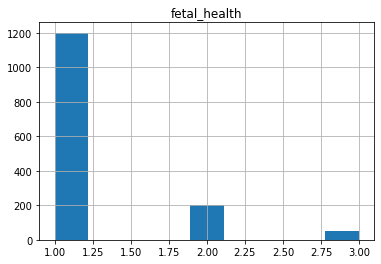

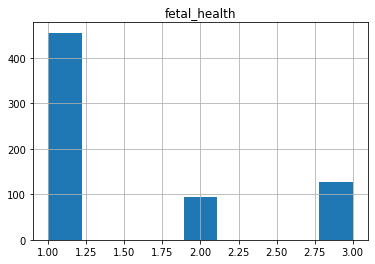

In [226]:
data_1.hist('fetal_health', bins=9)
data_2.hist('fetal_health', bins=9)

In [227]:
X_1 = data_1.drop(['fetal_health'], axis=1)
y_1 = data_1['fetal_health']
X_2 = data_2.drop(['fetal_health'], axis=1)
y_2 = data_2['fetal_health']

In [228]:
col_names = X_1.columns
TEST_SIZE = 0.20

X_train_1, X_test_1 = train_test_split(X_1, test_size=TEST_SIZE, random_state=42)
y_train_1, y_test_1 = train_test_split(y_1, test_size=TEST_SIZE, random_state=42)

X_train_2, X_test_2 = train_test_split(X_2, test_size=TEST_SIZE, random_state=42)
y_train_2, y_test_2 = train_test_split(y_2, test_size=TEST_SIZE, random_state=42)

print(f"X_train_1.shape = {X_train_1.shape}; y_train_1.shape = {y_train_1.shape}")
print(f"X_test_1.shape = {X_test_1.shape}; y_test_1.shape = {y_test_1.shape}")

print(f"X_train_2.shape = {X_train_2.shape}; y_train_2.shape = {y_train_2.shape}")
print(f"X_test_2.shape = {X_test_2.shape}; y_test_2.shape = {y_test_2.shape}")

X_train_1.shape = (1160, 21); y_train_1.shape = (1160,)
X_test_1.shape = (290, 21); y_test_1.shape = (290,)
X_train_2.shape = (540, 21); y_train_2.shape = (540,)
X_test_2.shape = (136, 21); y_test_2.shape = (136,)


(array([254.,   0.,   0.,   0.,   0.,  24.,   0.,   0.,   0.,  12.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

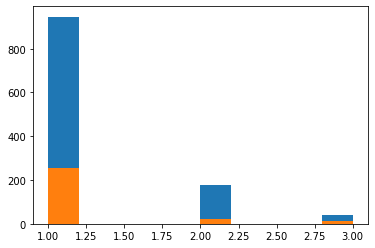

In [229]:
plt.hist(y_train_1)
plt.hist(y_test_1)

(array([95.,  0.,  0.,  0.,  0., 18.,  0.,  0.,  0., 23.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

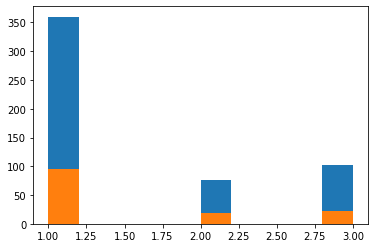

In [230]:
plt.hist(y_train_2)
plt.hist(y_test_2)

We have split the dataset as `80:20 :: train:test`, and ensured equal class distribution in train and test set

## (A) Training

(Q1) Classify the dataset using Decision Tree classifier and report precision, recall, accuracy and AUC-ROC curve on the test set. Visualize the Decision Tree (DT) and save the visualization as image (image name: DT_A_1.png/pdf/jpg).

In [231]:
### Use Decision Tree Classifier to train this model ###

clf_DT_A_1 = tree.DecisionTreeClassifier(random_state=42).fit(X_train_1, y_train_1)
y_pred_1 = np.array(clf_DT_A_1.predict(X_test_1))
print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       254
           2       0.70      0.79      0.75        24
           3       0.88      0.58      0.70        12

    accuracy                           0.96       290
   macro avg       0.85      0.79      0.81       290
weighted avg       0.96      0.96      0.95       290



In [232]:
def plot_roc_curve(xtrain, ytrain, xtest, ytest, clf):
    """
    xtrain: Training data
    ytrain: Training labels
    xtest: Testing data
    ytest: Testing labels
    params: parameters to train DT model
    """
    lw = 2
    
    # Binarize the output
    ytrain = label_binarize(ytrain, classes=[1, 2, 3])
    ytest = label_binarize(ytest, classes=[1, 2, 3])
    n_classes = ytrain.shape[1]
    
    # predict one class against the other
    classifier = OneVsRestClassifier(clf)
#     yscore = classifier.predict_proba(xtest)
    yscore = classifier.fit(xtrain, ytrain).predict_proba(xtest)
    
    # compute roc curve and roc area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(ytest[:, i], yscore[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(ytest.ravel(), yscore.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    
    # interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    # plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
         label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})',
         color='deeppink', linestyle=':', linewidth=4)
    plt.plot(fpr["macro"], tpr["macro"],
         label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})',
         color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

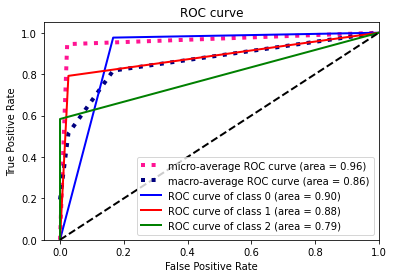

In [233]:
### plot ROC courve for clf_DT_A_1 ###

plot_roc_curve(X_train_1, y_train_1, X_test_1, y_test_1, clf_DT_A_1)

In [234]:
def plot_and_save_decision_tree(clf, name_of_file=None):
    """
    PLots decision tree corresponding to clf in Jupyter Notebook
    Also saves high res image of pdf file as Images/<name> if name is not None
    """
    fig = plt.figure(figsize=(10, 8))
    _ = tree.plot_tree(clf,
                       feature_names=col_names,
                       class_names=['1', '2', '3'],
                       filled=True)
    if name_of_file is not None:
        dot_data = tree.export_graphviz(clf, filled=True, feature_names=col_names, class_names=['1', '2', '3'])
        graph = gviz.Source(dot_data)
        path_to_file = f"{VISUALIZATIONS_FOLDER}/{name_of_file}"
        graph.render(path_to_file)

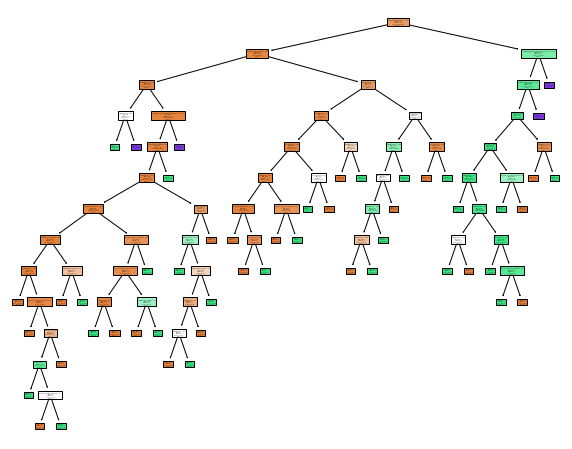

In [235]:
### plot the decision tree and save the plot as an image 'DT_A_1.pdf' in the Images folder ###
plot_and_save_decision_tree(clf_DT_A_1, 'DT_A_1')

(Q2) Train the DT on different depths and plot accuracy v/s depth graph

In [236]:
def plot_accuracy_score_vs_depth(X_train, y_train, X_test, y_test):
    """
    plot accuracy score vs max depth for training data and testing data.
    change max depth as hyperparameter
    """
    MAX_DEPTH = 10
    max_depths = [i for i in range(1, MAX_DEPTH + 1)]
    train_data_accuracy_scores = []
    test_data_accuracy_scores = []
    
    for i in max_depths:
        clf = tree.DecisionTreeClassifier(max_depth = i, random_state=42).fit(X_train, y_train)
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)
        train_data_accuracy_scores.append(accuracy_score(y_train, y_pred_train))
        test_data_accuracy_scores.append(accuracy_score(y_test, y_pred_test))
    
    plt.scatter(max_depths, train_data_accuracy_scores, marker='*', color='b')
    plt.scatter(max_depths, test_data_accuracy_scores, marker='+', color='r')
    plt.plot(max_depths, train_data_accuracy_scores, color='b', label='Train')
    plt.plot(max_depths, test_data_accuracy_scores, color='r', label='Test')
    plt.xlabel("Maximum Depth")
    plt.ylabel("Accuracy Score")
    plt.title("Accuracy Score V/S max_depth")
    plt.grid()
    plt.legend()
    plt.show()

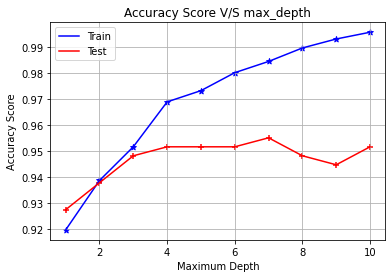

In [237]:
### We train the DT max_depths from 1 ... 10 ###
plot_accuracy_score_vs_depth(X_train_1, y_train_1, X_test_1, y_test_1)

(Q3) Taking the Decision Tree formulated in Q1, vary the following hyperparameters:- 
- Criterion
- Splitter
- min samples split
- max depth
- min samples leaf
- max features (sqrt/log2)
- class weight
- max leaf nodes

Report the observations (precision, recall, accuracy and AUC-ROC curve) on each. You just have to change one hyperparameter in one experiment keeping others fixed and observe the performance. Minimum observations to take should be 8. 

Report your best intuition/reasoning behind positive/negative performance scores against the base model (Q1). 

Keep the best obtained hyperparameters (DT referred as DT-A) from Q3 and carry on to Part B. Do not influence class weight in further experiments and set it as default (”none”).

In [238]:
def report_observations(clf, X_train, y_train, X_test, y_test):
    """
    Report performance metrics for decision tree classifier (Precision, Recall, Accuracy etc)
    Plot AUC curve
    """
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred, zero_division=0))
    plot_roc_curve(X_train, y_train, X_test, y_test, clf)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       254
           2       0.70      0.79      0.75        24
           3       0.88      0.58      0.70        12

    accuracy                           0.96       290
   macro avg       0.85      0.79      0.81       290
weighted avg       0.96      0.96      0.95       290



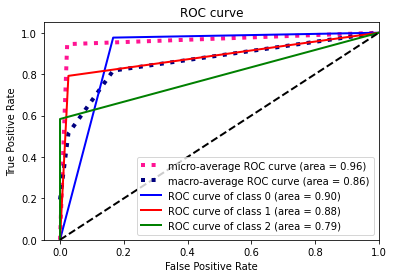

In [239]:
# original DT_A_1 parameters
print(clf_DT_A_1.get_params())
report_observations(clf_DT_A_1, X_train_1, y_train_1, X_test_1, y_test_1)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}
              precision    recall  f1-score   support

           1       0.97      0.98      0.97       254
           2       0.65      0.71      0.68        24
           3       0.86      0.50      0.63        12

    accuracy                           0.94       290
   macro avg       0.83      0.73      0.76       290
weighted avg       0.94      0.94      0.94       290



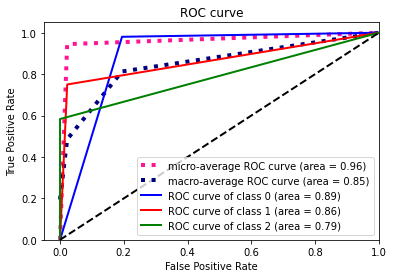

In [240]:
### change 1 ###
### criterion = Entropy ###
clf_DT_A_1_change1 = tree.DecisionTreeClassifier(criterion='entropy', random_state=42).fit(X_train_1, y_train_1)
print(clf_DT_A_1_change1.get_params())
report_observations(clf_DT_A_1_change1, X_train_1, y_train_1, X_test_1, y_test_1)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}
              precision    recall  f1-score   support

           1       0.97      0.98      0.97       254
           2       0.61      0.79      0.69        24
           3       0.00      0.00      0.00        12

    accuracy                           0.93       290
   macro avg       0.53      0.59      0.56       290
weighted avg       0.90      0.93      0.91       290



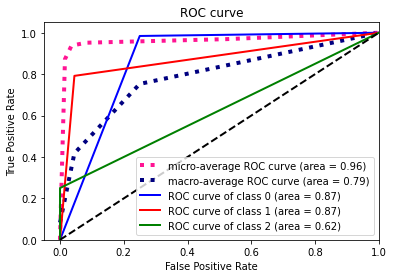

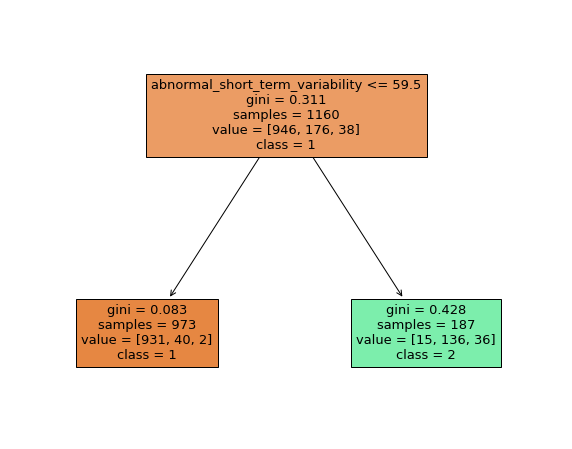

In [241]:
### change 2 ###
### max_depth = 1 ###
clf_DT_A_1_change2 = tree.DecisionTreeClassifier(max_depth=1, random_state=42).fit(X_train_1, y_train_1)
print(clf_DT_A_1_change2.get_params())
report_observations(clf_DT_A_1_change2, X_train_1, y_train_1, X_test_1, y_test_1)
plot_and_save_decision_tree(clf_DT_A_1_change2, None)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 100, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}
              precision    recall  f1-score   support

           1       0.97      0.98      0.97       254
           2       0.61      0.79      0.69        24
           3       0.00      0.00      0.00        12

    accuracy                           0.93       290
   macro avg       0.53      0.59      0.56       290
weighted avg       0.90      0.93      0.91       290



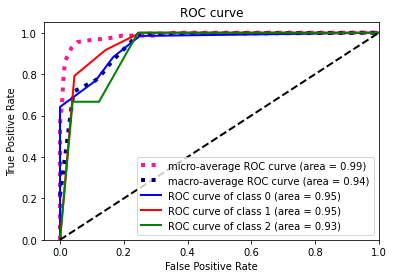

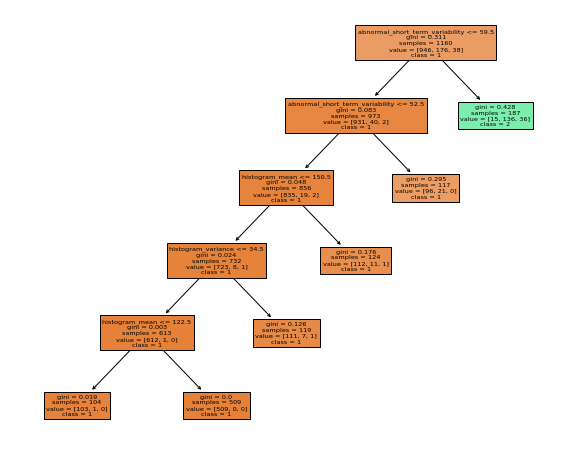

In [242]:
### change 3 ###
### change min_samples_leaf to 100 ###
clf_DT_A_1_change3 = tree.DecisionTreeClassifier(min_samples_leaf=100, random_state=42).fit(X_train_1, y_train_1)
print(clf_DT_A_1_change3.get_params())
report_observations(clf_DT_A_1_change3, X_train_1, y_train_1, X_test_1, y_test_1)
plot_and_save_decision_tree(clf_DT_A_1_change3, None)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 50, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}
              precision    recall  f1-score   support

           1       0.98      0.99      0.98       254
           2       0.76      0.79      0.78        24
           3       0.86      0.50      0.63        12

    accuracy                           0.96       290
   macro avg       0.86      0.76      0.80       290
weighted avg       0.95      0.96      0.95       290



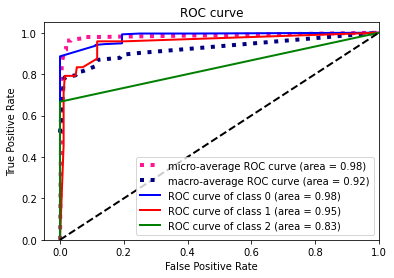

In [243]:
### change 4 ###
### change min_samples_split to 50 ###
clf_DT_A_1_change4 = tree.DecisionTreeClassifier(min_samples_split=50, random_state=42).fit(X_train_1, y_train_1)
print(clf_DT_A_1_change4.get_params())
report_observations(clf_DT_A_1_change4, X_train_1, y_train_1, X_test_1, y_test_1)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}
              precision    recall  f1-score   support

           1       0.98      0.97      0.97       254
           2       0.59      0.67      0.63        24
           3       0.82      0.75      0.78        12

    accuracy                           0.93       290
   macro avg       0.80      0.80      0.79       290
weighted avg       0.94      0.93      0.94       290



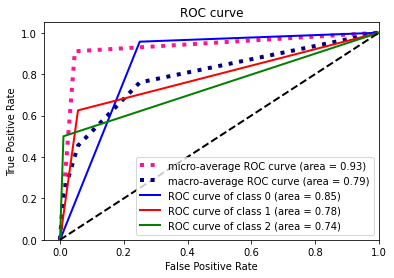

In [244]:
### change 5 ###
### change max_features to 'log2' ###
clf_DT_A_1_change5 = tree.DecisionTreeClassifier(max_features='log2', random_state=42).fit(X_train_1, y_train_1)
print(clf_DT_A_1_change5.get_params())
report_observations(clf_DT_A_1_change5, X_train_1, y_train_1, X_test_1, y_test_1)
# plot_and_save_decision_tree(clf_DT_A_1_change5, None)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}
              precision    recall  f1-score   support

           1       0.98      0.97      0.97       254
           2       0.59      0.67      0.63        24
           3       0.82      0.75      0.78        12

    accuracy                           0.93       290
   macro avg       0.80      0.80      0.79       290
weighted avg       0.94      0.93      0.94       290



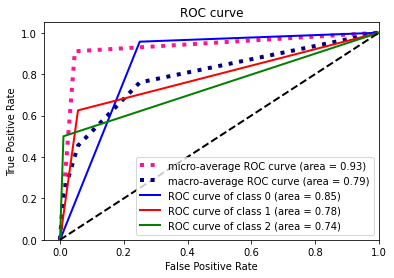

In [245]:
### change 6 ###
### change max_features to 'sqrt' ###
clf_DT_A_1_change6 = tree.DecisionTreeClassifier(max_features='sqrt', random_state=42).fit(X_train_1, y_train_1)
print(clf_DT_A_1_change6.get_params())
report_observations(clf_DT_A_1_change6, X_train_1, y_train_1, X_test_1, y_test_1)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}
              precision    recall  f1-score   support

           1       0.97      1.00      0.98       254
           2       0.86      0.79      0.83        24
           3       1.00      0.50      0.67        12

    accuracy                           0.96       290
   macro avg       0.94      0.76      0.82       290
weighted avg       0.96      0.96      0.95       290



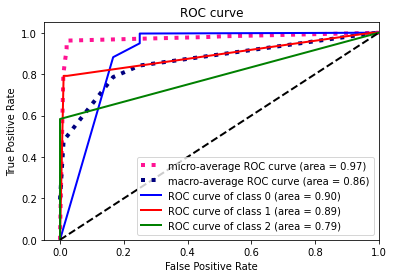

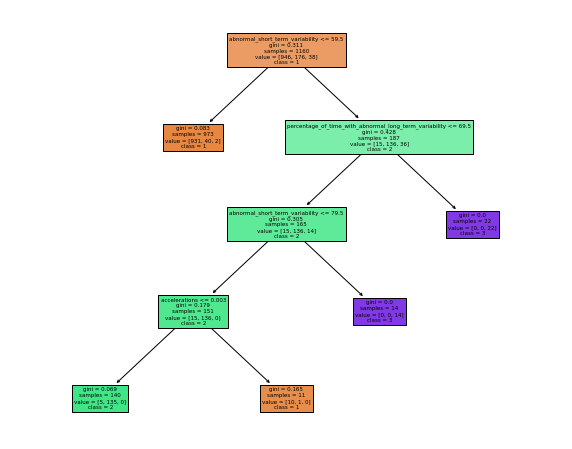

In [246]:
### change 7 ###
### change max_leaf_nodes to 5 ###
clf_DT_A_1_change7 = tree.DecisionTreeClassifier(max_leaf_nodes=5, random_state=42).fit(X_train_1, y_train_1)
print(clf_DT_A_1_change7.get_params())
report_observations(clf_DT_A_1_change7, X_train_1, y_train_1, X_test_1, y_test_1)
plot_and_save_decision_tree(clf_DT_A_1_change7, None)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.05, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}
              precision    recall  f1-score   support

           1       0.97      0.98      0.97       254
           2       0.61      0.79      0.69        24
           3       0.00      0.00      0.00        12

    accuracy                           0.93       290
   macro avg       0.53      0.59      0.56       290
weighted avg       0.90      0.93      0.91       290



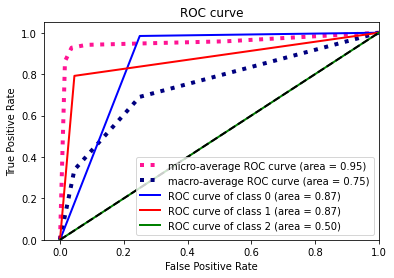

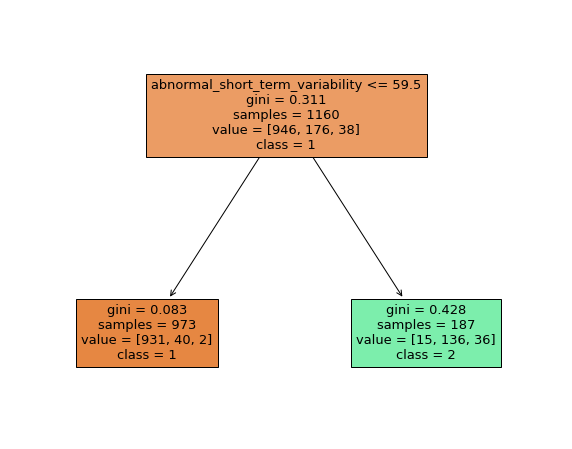

In [247]:
### change 8 ###
### change min_impurity_decrease to 0.05 ###
clf_DT_A_1_change8 = tree.DecisionTreeClassifier(min_impurity_decrease = 0.05, random_state=42).fit(X_train_1, y_train_1)
print(clf_DT_A_1_change8.get_params())
report_observations(clf_DT_A_1_change8, X_train_1, y_train_1, X_test_1, y_test_1)
plot_and_save_decision_tree(clf_DT_A_1_change8, None)

After hyperparameter tuning, we observe the best model is 'clf_DT_A_1'. We store this model.

ccp_alpha : 0.0
class_weight : None
criterion : gini
max_depth : None
max_features : None
max_leaf_nodes : None
min_impurity_decrease : 0.0
min_impurity_split : None
min_samples_leaf : 1
min_samples_split : 2
min_weight_fraction_leaf : 0.0
presort : deprecated
random_state : 42
splitter : best
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       254
           2       0.70      0.79      0.75        24
           3       0.88      0.58      0.70        12

    accuracy                           0.96       290
   macro avg       0.85      0.79      0.81       290
weighted avg       0.96      0.96      0.95       290



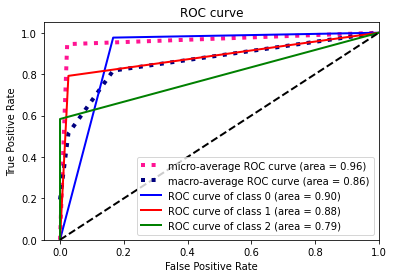

In [248]:
### write the model with the best obtained performance to file 'models/DT_A_1.pickle' ###

import pickle

clf_DT_A_1_params = clf_DT_A_1.get_params()
for param in clf_DT_A_1_params :
    print(f"{param} : {clf_DT_A_1_params[param]}")
    
report_observations(clf_DT_A_1, X_train_1, y_train_1, X_test_1, y_test_1)

with open(f'{MODELS_FOLDER}\DT_A_1.pickle', 'wb') as f:
    pickle.dump(clf_DT_A_1, f)

## (B) Post Pruning

(Q1) 
Remove a random node from the DT-A and observe the changes. 
Report your observations in terms of performance (precision, recall, AUC-ROC curve and accuracy) along with the tree diagram. 
Save the diagram as DT_B_1.png/pdf/jpg.

In [249]:
def print_tree_text_form(clf):
    """ 
    print decision tree 'clf' in a text format
    """
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)] 
    while len(stack) > 0:

        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        is_split_node = children_left[node_id] != children_right[node_id]

        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    print("The binary tree structure has {n} nodes and has "
          "the following tree structure:".format(n=n_nodes))
    for i in range(n_nodes):
        if is_leaves[i]:
            print("{space}depth={depth} node={node} is a leaf node.".format(
                space=node_depth[i] * " ", depth=node_depth[i], node=i))
        else:
            print("{space}depth={depth} node={node} is a split node: "
                  "go to node {left} if X[:, {feature}] <= {threshold} "
                  "else to node {right}.".format(
                      space=node_depth[i] * " ",
                      depth=node_depth[i],
                      node=i,
                      left=children_left[i],
                      feature=feature[i],
                      threshold=threshold[i],
                      right=children_right[i]))

In [250]:
clf_DT_B_1 = pd.read_pickle(f'DT_A_1.pickle')
print_tree_text_form(clf_DT_B_1)

The binary tree structure has 101 nodes and has the following tree structure:
depth=0 node=0 is a split node: go to node 1 if X[:, 7] <= 59.5 else to node 78.
 depth=1 node=1 is a split node: go to node 2 if X[:, 7] <= 52.5 else to node 47.
  depth=2 node=2 is a split node: go to node 3 if X[:, 17] <= 105.5 else to node 6.
   depth=3 node=3 is a split node: go to node 4 if X[:, 16] <= 108.0 else to node 5.
    depth=4 node=4 is a leaf node.
    depth=4 node=5 is a leaf node.
   depth=3 node=6 is a split node: go to node 7 if X[:, 9] <= 65.0 else to node 46.
    depth=4 node=7 is a split node: go to node 8 if X[:, 14] <= 15.0 else to node 45.
     depth=5 node=8 is a split node: go to node 9 if X[:, 16] <= 161.5 else to node 34.
      depth=6 node=9 is a split node: go to node 10 if X[:, 6] <= 0.0005000000237487257 else to node 25.
       depth=7 node=10 is a split node: go to node 11 if X[:, 15] <= 3.5 else to node 22.
        depth=8 node=11 is a split node: go to node 12 if X[:, 17] 

is_leaf(0)
is_leaf(1)
is_leaf(47)
For curr_index=1; child_index=47
impurity_left=0.1119614512471655; impurity_right=0.4995408631772268
Right child of 1 = 47; 47 is a NOT leaf node.
Thus, we remove 47 with less impure node present in subtree of 47
New right child = 48
is_leaf(78)
is_leaf(79)
is_leaf(80)
is_leaf(81)
is_leaf(82)
is_leaf(83)
is_leaf(84)
is_leaf(85)
is_leaf(86)
is_leaf(87)
is_leaf(88)
is_leaf(89)
is_leaf(90)
is_leaf(91)
is_leaf(92)
is_leaf(93)
is_leaf(94)
is_leaf(95)
is_leaf(96)
is_leaf(97)
is_leaf(98)
is_leaf(99)
is_leaf(100)
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       254
           2       0.73      0.79      0.76        24
           3       0.88      0.58      0.70        12

    accuracy                           0.96       290
   macro avg       0.86      0.79      0.82       290
weighted avg       0.96      0.96      0.96       290



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort

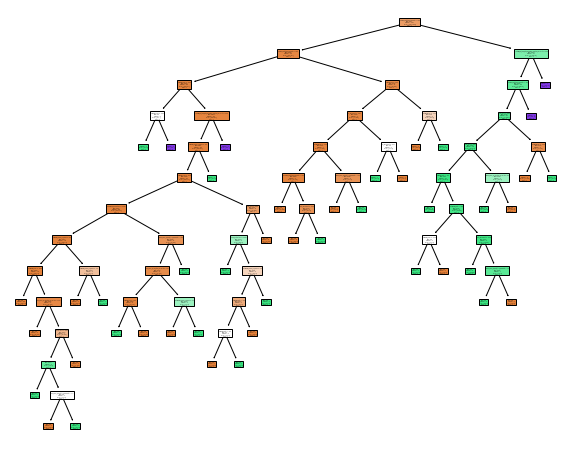

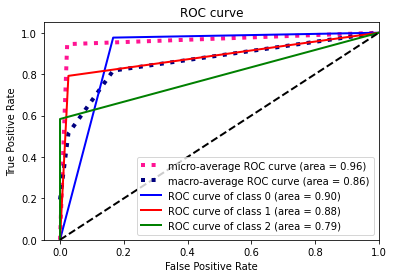

In [251]:
### Obtain a copy of DT_A_1 and remove a random node from it###
from sklearn.tree._tree import TREE_LEAF

def is_leaf(dtree, index):
    """
    boolean: is node 'index' a leaf node ?
    """
    print(f"is_leaf({index})")
    return dtree.children_right[index] == TREE_LEAF and dtree.children_left[index]
    
def process(dtree, curr_index, child_index, direction):
    """
    Do the dirty work on remove_random_node(...) here
    """
    if is_leaf(dtree, child_index):
        if direction == 'right':
            print(f"Right child of {curr_index} = {child_index}; {child_index} is a leaf node.")
            print(f"Thus, we remove both the subtrees.")
        else:
            print(f"Left child of {curr_index} = {child_index}; {child_index} is a leaf node.")
            print(f"Thus, we remove both the subtrees.")

        dtree.children_right[curr_index] = TREE_LEAF
        dtree.children_left[curr_index] = TREE_LEAF
            
    else:
        impurity_left = dtree.impurity[dtree.children_left[child_index]]
        impurity_right = dtree.impurity[dtree.children_right[child_index]]
        print(f"For curr_index={curr_index}; child_index={child_index}")
        print(f"impurity_left={impurity_left}; impurity_right={impurity_right}")
        
        if direction == 'right':
            # by default remove right child
            new_right_child = dtree.children_left[child_index]
            if impurity_left > impurity_right:
                # remove left
                new_right_child = dtree.children_right[child_index]
                
            print(f"Right child of {curr_index} = {child_index}; {child_index} is a NOT leaf node.") 
            print(f"Thus, we remove {child_index} with less impure node present in subtree of {child_index}")   
            print(f"New right child = {new_right_child}")
            dtree.children_right[curr_index] = new_right_child
        
        else:
            # by default remove right child
            new_left_child = dtree.children_left[child_index]
            if impurity_left > impurity_right:
                # remove left
                new_left_child = dtree.children_right[child_index]
                
            print(f"Left child of {curr_index} = {child_index}; {child_index} is a NOT leaf node.") 
            print(f"Thus, we remove {child_index} with less impure node present in subtree of {child_index}")   
            print(f"New left child = {new_left_child}")
            dtree.children_left[curr_index] = new_left_child

            
def remove_random_node(dtree, curr_index, to_remove_index):
    """
    Remove a random node and reconnect the tree:
    Algo:
    1. If current node is leaf, return
    2. If right node is the node to remove:
    2.1 If right node is leaf, remove left node AND right node AND make the current node also as leaf
    2.2 Else remove right node, connect current node to right's immediate children with lower impurity
    3. Else if left node is node to remove:
    3.1 If left node is leaf, remove left node AND right node AND make the current node also as leaf
    3.2 Else remove left node, connect current node to left's immediate children with lower impurity
    4. Else recurse to children
    """
    if curr_index==to_remove_index or is_leaf(dtree, curr_index):
        return
    
    right_child_index = dtree.children_right[curr_index]
    left_child_index = dtree.children_left[curr_index]
    
    if right_child_index == to_remove_index:
        process(dtree, curr_index, right_child_index, 'right')
        
    elif left_child_index == to_remove_index:
        process(dtree, curr_index, left_child_index, 'left')
    
    else:
        remove_random_node(dtree, dtree.children_left[curr_index], to_remove_index)
        remove_random_node(dtree, dtree.children_right[curr_index], to_remove_index)
    

ROOT_INDEX = 0
RANDOM_NODE_INDEX = 47
# obtain a copy of DT_A_1

# apply pruning 
if ROOT_INDEX == RANDOM_NODE_INDEX:
    print(f"Error; Root cannot be removed")
else:
    remove_random_node(clf_DT_B_1.tree_, ROOT_INDEX, RANDOM_NODE_INDEX)

# show performance and save model diagram
plot_and_save_decision_tree(clf_DT_B_1, 'DT_B_1')
report_observations(clf_DT_B_1, X_train_1, y_train_1, X_test_1, y_test_1)

(Q2) Apply the Cost Complexity pruning technique and any other pruning technique of your
choice on the DT obtained from part A (DT-A). 

Report the value of alpha for Cost Complexity Pruning and parameter values for the second pruning technique (ex. alpha, beta values if using Alpha-Beta pruning) and precision, recall and accuracy between the DT-A and the pruned trees. 

Visualize the DT-B-2-CC and DT-B-2-XX and save the image as DT_B_2_CC.png/pdf/jpg and DT_B_2_XX.png/pdf/jpg.

We use 2 pruning techniques :
1. Postpruning using Cost Complexity Pruning technique
2. Prepruning using GridsearchCV to find optimal parameters to pre-prune the tree 

In [252]:
### apply post pruning with cost complexity pruning technique ###
# obtain copy of DT_A_1
clf_DT_B_2 = pd.read_pickle(f'DT_A_1.pickle')
path = clf_DT_B_2.cost_complexity_pruning_path(X_train_1, y_train_1)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

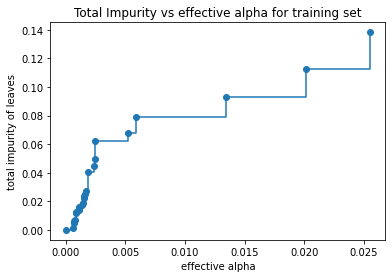

In [253]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [254]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
    clf.fit(X_train_1, y_train_1)
    clfs.append(clf)

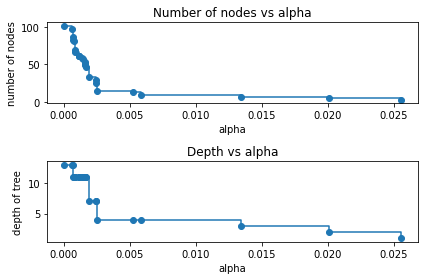

In [255]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

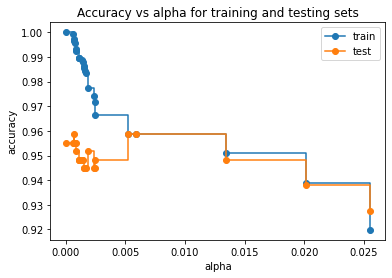

In [256]:
train_scores = [clf.score(X_train_1, y_train_1) for clf in clfs]
test_scores = [clf.score(X_test_1, y_test_1) for clf in clfs] 

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Best value of alpha:  0.0006791260858120565
Training accuracy of best model:  0.9974137931034482
Test accuracy of best model:  0.9586206896551724
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       254
           2       0.71      0.83      0.77        24
           3       0.88      0.58      0.70        12

    accuracy                           0.96       290
   macro avg       0.86      0.80      0.82       290
weighted avg       0.96      0.96      0.96       290



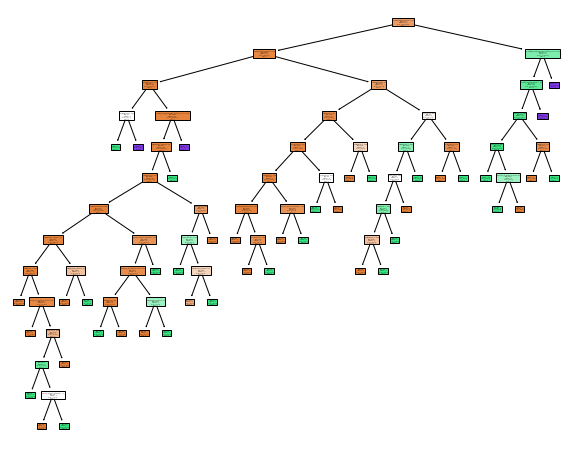

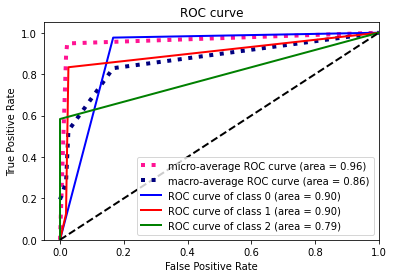

In [257]:
### Select the best testing accuracy for alpha ### 
index_best_model = np.argmax(test_scores)

best_model = clfs[index_best_model]
print('Best value of alpha: ', ccp_alphas[index_best_model])
print('Training accuracy of best model: ',best_model.score(X_train_1, y_train_1))
print('Test accuracy of best model: ',best_model.score(X_test_1, y_test_1))

plot_and_save_decision_tree(best_model, 'DT_B_2_CC')
report_observations(best_model, X_train_1, y_train_1, X_test_1, y_test_1)
with open(f'DT_B_2_CC.pickle', 'wb') as f:
    pickle.dump(best_model, f)

ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: 6
max_features: None
max_leaf_nodes: 20
min_impurity_decrease: 0.0
min_impurity_split: None
min_samples_leaf: 3
min_samples_split: 8
min_weight_fraction_leaf: 0.0
presort: deprecated
random_state: 42
splitter: best
              precision    recall  f1-score   support

           1       0.98      0.99      0.98       254
           2       0.70      0.79      0.75        24
           3       1.00      0.50      0.67        12

    accuracy                           0.95       290
   macro avg       0.89      0.76      0.80       290
weighted avg       0.96      0.95      0.95       290



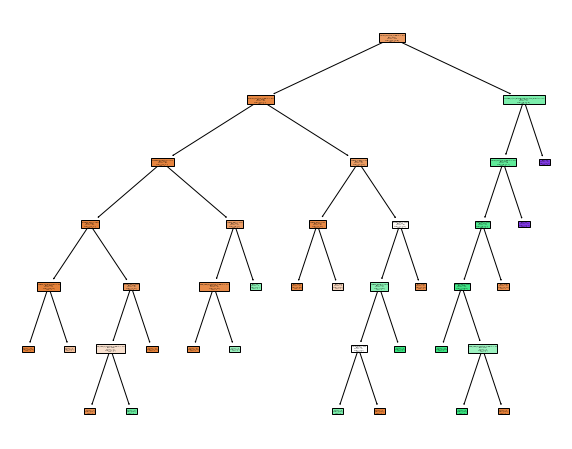

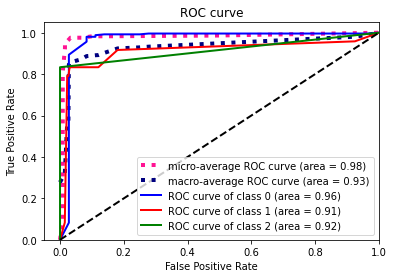

In [258]:
### prepruning using parameter tuning ###


parameters = {
    'max_depth' : [3, 6, 9],
    'min_samples_split' : [2, 8, 20],
    'min_samples_leaf' : [3, 7, 25],
    'max_features' : [None, 'sqrt', 'log2'],
    'max_leaf_nodes' : [5, 20, 100],
}

dtree_GSCV = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), parameters)
dtree_GSCV.fit(X_train_1, y_train_1)
params = dtree_GSCV.best_estimator_.get_params()

for param in params:
    print(f"{param}: {params[param]}")

clf_DT_B_2_XX = tree.DecisionTreeClassifier(
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'],
    max_features=params['max_features'],
    max_leaf_nodes=params['max_leaf_nodes'],
    random_state=42,
).fit(X_train_1, y_train_1)

plot_and_save_decision_tree(clf_DT_B_2_XX, 'DT_B_2_XX')
report_observations(clf_DT_B_2_XX, X_train_1, y_train_1, X_test_1, y_test_1)
with open(f'DT_B_2_XX.pickle', 'wb') as f:
    pickle.dump(clf_DT_B_2_XX, f)

(Q3) 
Apply the Hybrid SLIQ pruning technique on DT-A and observe the performance
difference. 
Compare the tree size, precision, recall and accuracy for DT-A, DT-B-2-CC, DT-B-2-XX and
DT-B-3 and report your observations. Save the best performing tree as DT_B_3.png/pdf/jpg.

3 Not pruned | cost_before = 2.0; cost_after = 2.0
18 Not pruned | cost_before = 2.0; cost_after = 2.0
16 Pruned | cost_before = 4.0; cost_after = 2.666666666666667
15 Not pruned | cost_before = 5.251629167387823; cost_after = 8.058823529411764
13 Not pruned | cost_before = 8.251629167387822; cost_after = 10.444444444444446
11 Pruned | cost_before = 11.573557262275184; cost_after = 10.93548387096771
22 Not pruned | cost_before = 2.0; cost_after = 2.333333333333333
10 Pruned | cost_before = 15.742838793025314; cost_after = 12.907455012853429
27 Not pruned | cost_before = 2.0; cost_after = 2.942857142857143
30 Not pruned | cost_before = 2.0; cost_after = 2.333333333333333
26 Not pruned | cost_before = 5.584962500721156; cost_after = 6.526315789473687
25 Not pruned | cost_before = 8.584962500721156; cost_after = 9.75
9 Pruned | cost_before = 25.07738001429574; cost_after = 22.704156479217605
39 Not pruned | cost_before = 2.0; cost_after = 2.0
38 Pruned | cost_before = 4.0; cost_after = 2.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort

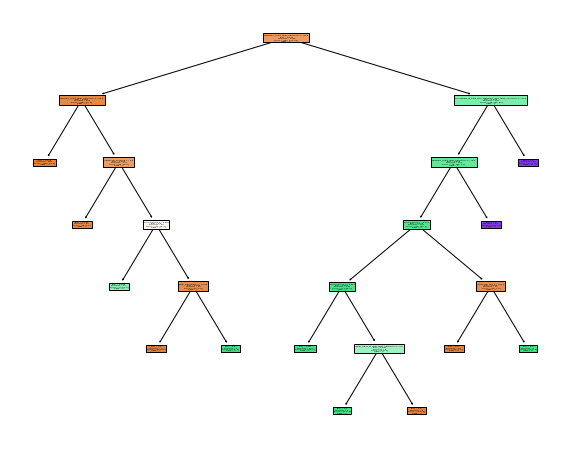

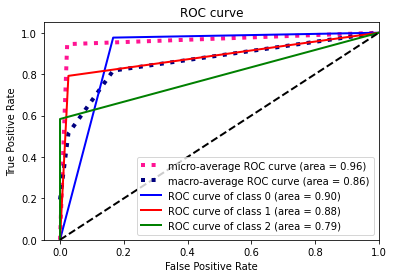

In [259]:
### apply hybrid sliq pruning technique to prune decision tree ###

from sklearn.tree._tree import TREE_LEAF
import math
count_internal_nodes = dict()

def calculate_number_internal_nodes(dtree, index):
    """
    return number of internal nodes in the subtree of 'index'
    """
    if is_leaf(dtree, index):
        count_internal_nodes[index] = 0
        return
    
    # if the current node is an internal node
    l = dtree.children_left[index]
    r = dtree.children_right[index]
    calculate_number_internal_nodes(dtree, l)
    calculate_number_internal_nodes(dtree, r)
    count_internal_nodes[index] = 1 + count_internal_nodes[l] + count_internal_nodes[r]


def is_leaf(dtree, index):
    """boolean : return whether node is leaf node"""
    return (dtree.children_left[index] == TREE_LEAF and 
            dtree.children_right[index] == TREE_LEAF)


def prune_hybrid_sliq(dtree, index=0):
    """
    apply the hybrid sliq post pruning algorithm to prune index's subtree
    """
    # fill dicionary to count number of internal nodes
    calculate_number_internal_nodes(dtree, index)
    
    # if the current node is a leaf node, return the MDL cost
    if is_leaf(dtree, index):
        cost = dtree.impurity[index] * dtree.n_node_samples[index]
        return cost + 1
    
    # if the current node is an internal node
    l = prune_hybrid_sliq(dtree, dtree.children_left[index])
    r = prune_hybrid_sliq(dtree, dtree.children_right[index])
    # if you dont prune
    cost_before_pruning = math.log(count_internal_nodes[index], 2) + l + r
    # if this becomes leaf node
    cost_after_pruning = dtree.impurity[index] * dtree.n_node_samples[index] + 1
    
    result = "Not pruned"
    
    if cost_after_pruning < cost_before_pruning:
        dtree.children_left[index] = TREE_LEAF
        dtree.children_right[index] = TREE_LEAF
        result = "Pruned"
    
    print(f"{index} {result} | cost_before = {cost_before_pruning}; cost_after = {cost_after_pruning}")
    
    return min(cost_before_pruning, cost_after_pruning)

# obtain copy of DT_A_1
clf_sliq = pd.read_pickle(f'DT_A_1.pickle')

# apply pruning algorithm
prune_hybrid_sliq(clf_sliq.tree_, 0)

plot_and_save_decision_tree(clf_sliq)
report_observations(clf_sliq, X_train_1, y_train_1, X_test_1, y_test_1)


Compare performace between models

In [260]:
DT_A_1 = pd.read_pickle(f'DT_A_1.pickle')
DT_B_2_CC = pd.read_pickle(f'DT_B_2_CC.pickle')
DT_B_2_XX = pd.read_pickle(f'DT_B_2_XX.pickle')
#clf_sliq

In [261]:
def output_num_nodes_and_max_depth(clf, name=None):
    """
    Return the number of nodes and max_depth of decision tree
    """
    n_nodes = 0
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    
    node_depth = dict()
    max_depth = 0
    
    stack = [(0, 0)] 
    while len(stack) > 0:
        n_nodes += 1
        node_id, depth = stack.pop()
        node_depth[node_id] = depth
        
        if depth > max_depth:
            max_depth = depth
        
        is_split_node = children_left[node_id] != children_right[node_id]

        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
    
    if name:
        print(name)
    
    print("The binary tree structure has {n} nodes".format(n=n_nodes))
    print("The max depth of binary tree structure is {n}".format(n=max_depth))



DT_A_1
The binary tree structure has 101 nodes
The max depth of binary tree structure is 13
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       254
           2       0.70      0.79      0.75        24
           3       0.88      0.58      0.70        12

    accuracy                           0.96       290
   macro avg       0.85      0.79      0.81       290
weighted avg       0.96      0.96      0.95       290



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort

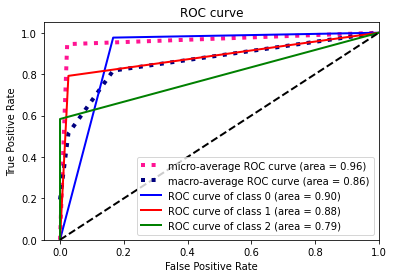

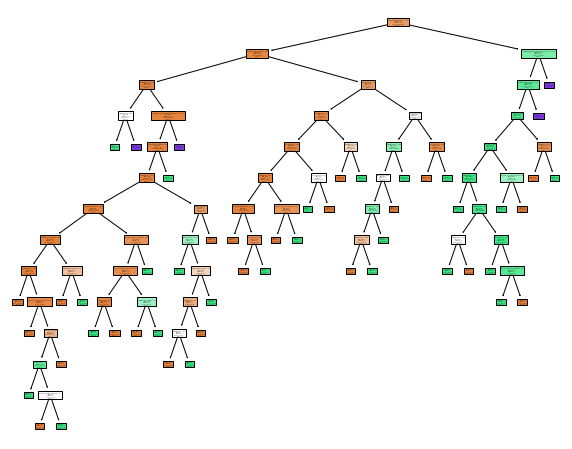

In [262]:
output_num_nodes_and_max_depth(DT_A_1, 'DT_A_1')
report_observations(DT_A_1, X_train_1, y_train_1, X_test_1, y_test_1)
plot_and_save_decision_tree(DT_A_1, None)

DT_B_2_CC
The binary tree structure has 87 nodes
The max depth of binary tree structure is 13
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       254
           2       0.71      0.83      0.77        24
           3       0.88      0.58      0.70        12

    accuracy                           0.96       290
   macro avg       0.86      0.80      0.82       290
weighted avg       0.96      0.96      0.96       290



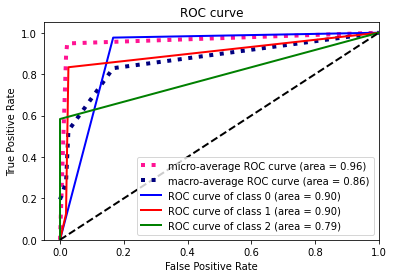

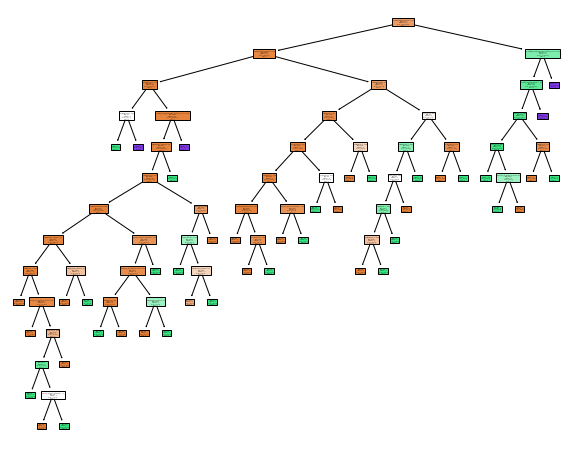

In [263]:
output_num_nodes_and_max_depth(DT_B_2_CC, 'DT_B_2_CC')
report_observations(DT_B_2_CC, X_train_1, y_train_1, X_test_1, y_test_1)
plot_and_save_decision_tree(DT_B_2_CC, None)


DT_B_2_XX
The binary tree structure has 39 nodes
The max depth of binary tree structure is 6
              precision    recall  f1-score   support

           1       0.98      0.99      0.98       254
           2       0.70      0.79      0.75        24
           3       1.00      0.50      0.67        12

    accuracy                           0.95       290
   macro avg       0.89      0.76      0.80       290
weighted avg       0.96      0.95      0.95       290



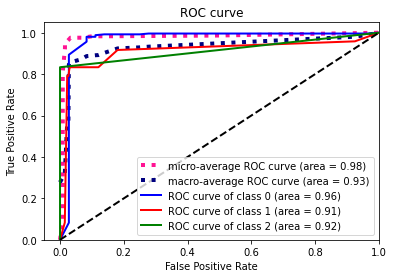

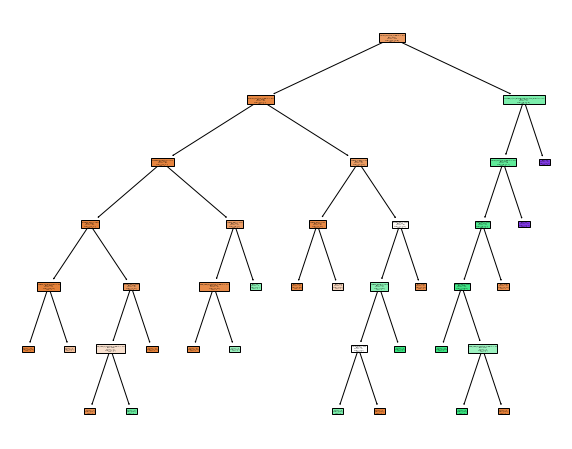

In [264]:
output_num_nodes_and_max_depth(DT_B_2_XX, 'DT_B_2_XX')
report_observations(DT_B_2_XX, X_train_1, y_train_1, X_test_1, y_test_1)
plot_and_save_decision_tree(DT_B_2_XX, None)

DT_SLIQ
The binary tree structure has 23 nodes
The max depth of binary tree structure is 6
              precision    recall  f1-score   support

           1       0.96      0.99      0.97       254
           2       0.78      0.75      0.77        24
           3       1.00      0.50      0.67        12

    accuracy                           0.95       290
   macro avg       0.91      0.75      0.80       290
weighted avg       0.95      0.95      0.94       290



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort

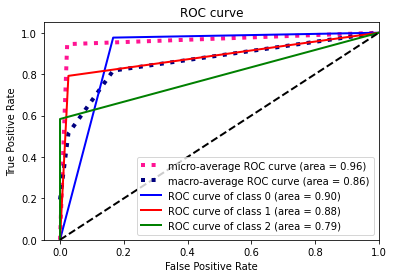

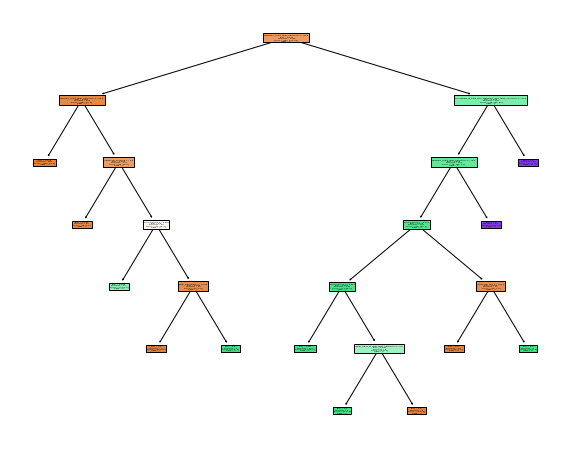

In [265]:

output_num_nodes_and_max_depth(clf_sliq, 'DT_SLIQ')
report_observations(clf_sliq, X_train_1, y_train_1, X_test_1, y_test_1)
plot_and_save_decision_tree(clf_sliq, None)

DT_B_2_CC is the best performing model across all 4. Save it as DT_B_3 

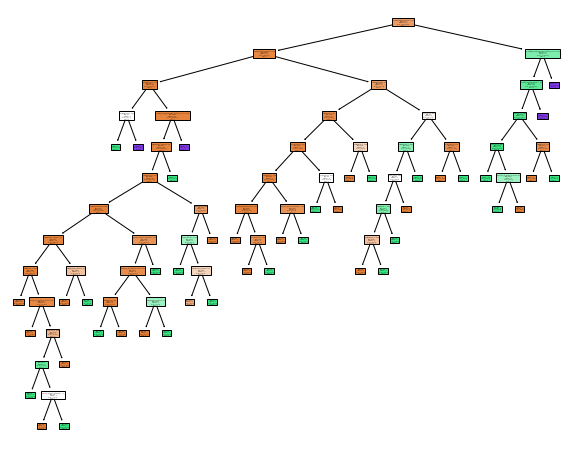

In [266]:
best_model_part_b = DT_B_2_CC

with open(f'DT_B_3.pickle', 'wb') as f:
    pickle.dump(best_model_part_b, f)

plot_and_save_decision_tree(best_model_part_b, 'DT_B_3')    

(C) Experiments

In [267]:
y_pred = DT_A_1.predict(X_test_1)
print(classification_report(y_test_1, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       254
           2       0.70      0.79      0.75        24
           3       0.88      0.58      0.70        12

    accuracy                           0.96       290
   macro avg       0.85      0.79      0.81       290
weighted avg       0.96      0.96      0.95       290



In [268]:
X_train_1.shape

(1160, 21)

(-1.0, 1.0000000000000018, -1.0, 1.0000000000000018)

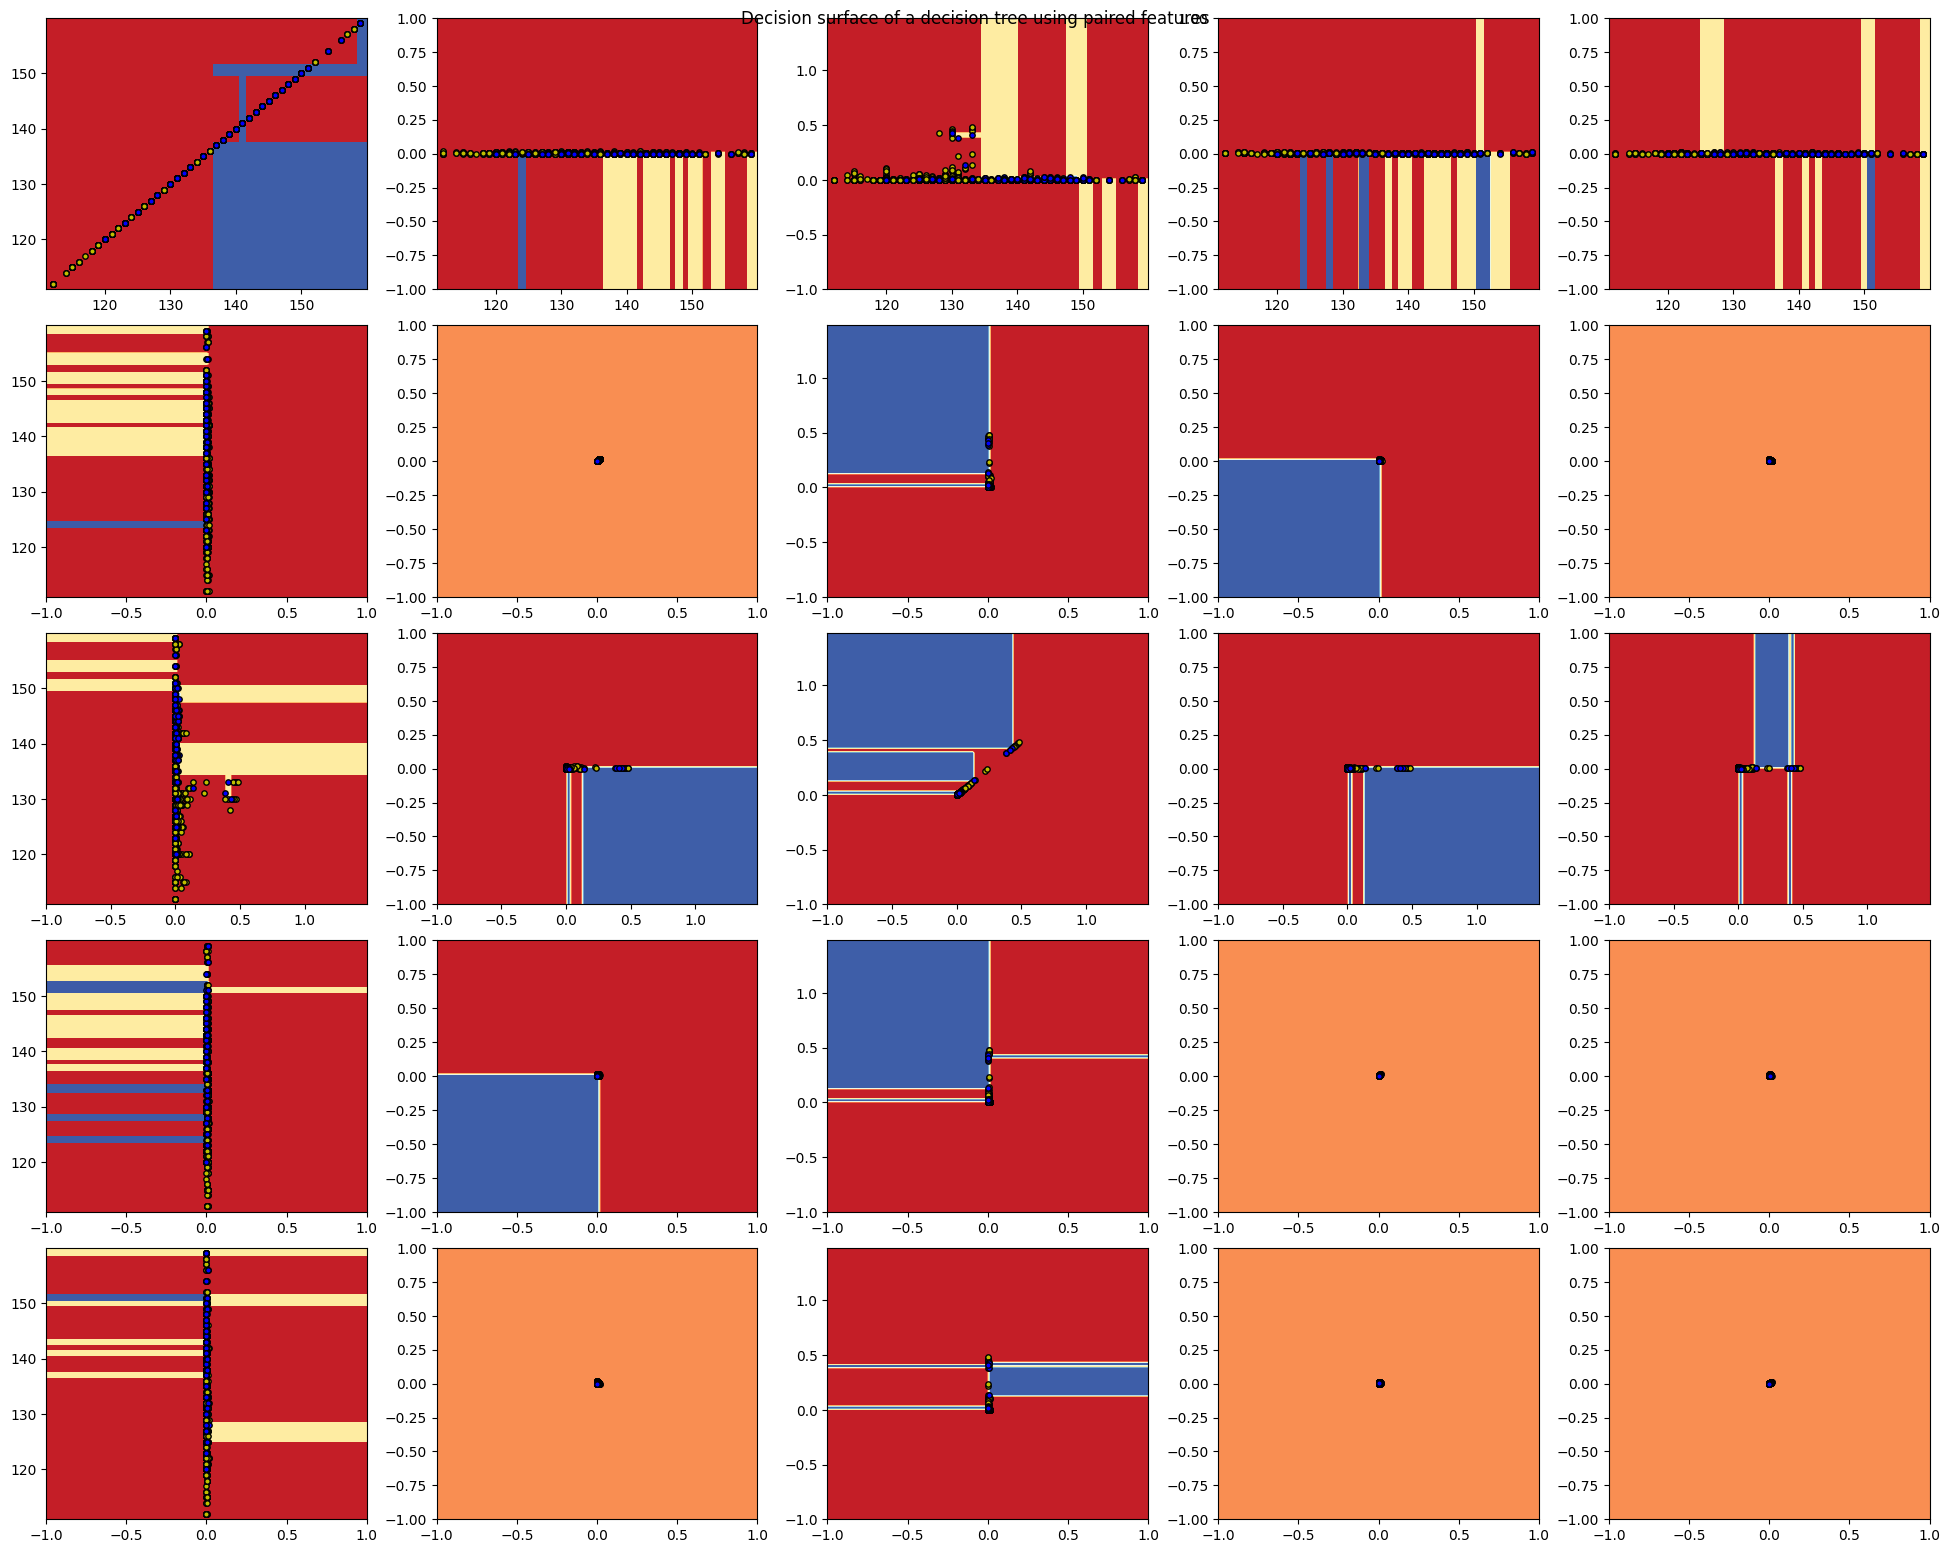

In [269]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = X_train_1.shape[1]
plot_colors = "ryb"
plot_step = 0.02
n = 5

plt.figure(figsize=(20, 16), dpi=100)

for pairidx, pair in enumerate([[i, j] for i in range(n) for j in range(n)]):
    # We only take the two corresponding features
    X = X_train_1.to_numpy()[:, pair]
    y = y_train_1

    # Train
    clf = DecisionTreeClassifier().fit(X, y)
    # prune it using sliq here ?
    
    # Plot the decision boundary
    plt.subplot(n, n, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)


    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color,
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
# plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
